#### Calculate shap values and generate plot

In [1]:
import shap 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

import numpy as np
import pandas as pd
from pickle import load

import matplotlib.pylab as pl
import matplotlib.pyplot as plt

shap.initjs()

In [3]:
x_train = pd.read_csv("../output/05/x_train.csv", header = 0,index_col = 0)
x_test = pd.read_csv("../output/05/x_test.csv", header = 0,index_col = 0)
y_train = pd.read_csv("../output/05/y_train.csv", header = 0, index_col = 0)
y_test = pd.read_csv("../output/05/y_test.csv", header = 0, index_col = 0)

x_train = x_train.sort_index(axis = 0)
x_test = x_test.sort_index(axis = 0)
y_train = y_train.sort_index(axis = 0)
y_test = y_test.sort_index(axis = 0)

mod = load(open("../model/rf_homa_alc.pkl", "rb"))

In [4]:
print("Mod params: {}".format(mod))

Mod params: GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('model',
                                        RandomForestClassifier(n_jobs=-1,
                                                               random_state=1))]),
             n_jobs=-1,
             param_grid={'model__max_depth': array([3, 5, 7, 9]),
                         'model__max_features': ['sqrt', 'log2'],
                         'model__min_samples_split': array([2, 3, 4, 5]),
                         'model__n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000])},
             refit='bal_acc', scoring={'bal_acc': 'balanced_accuracy'})


In [5]:
rf_mod = mod.best_estimator_.named_steps['model']

In [6]:
feature_names = x_test.columns

In [7]:
shap_values = shap.TreeExplainer(rf_mod).shap_values(x_test)

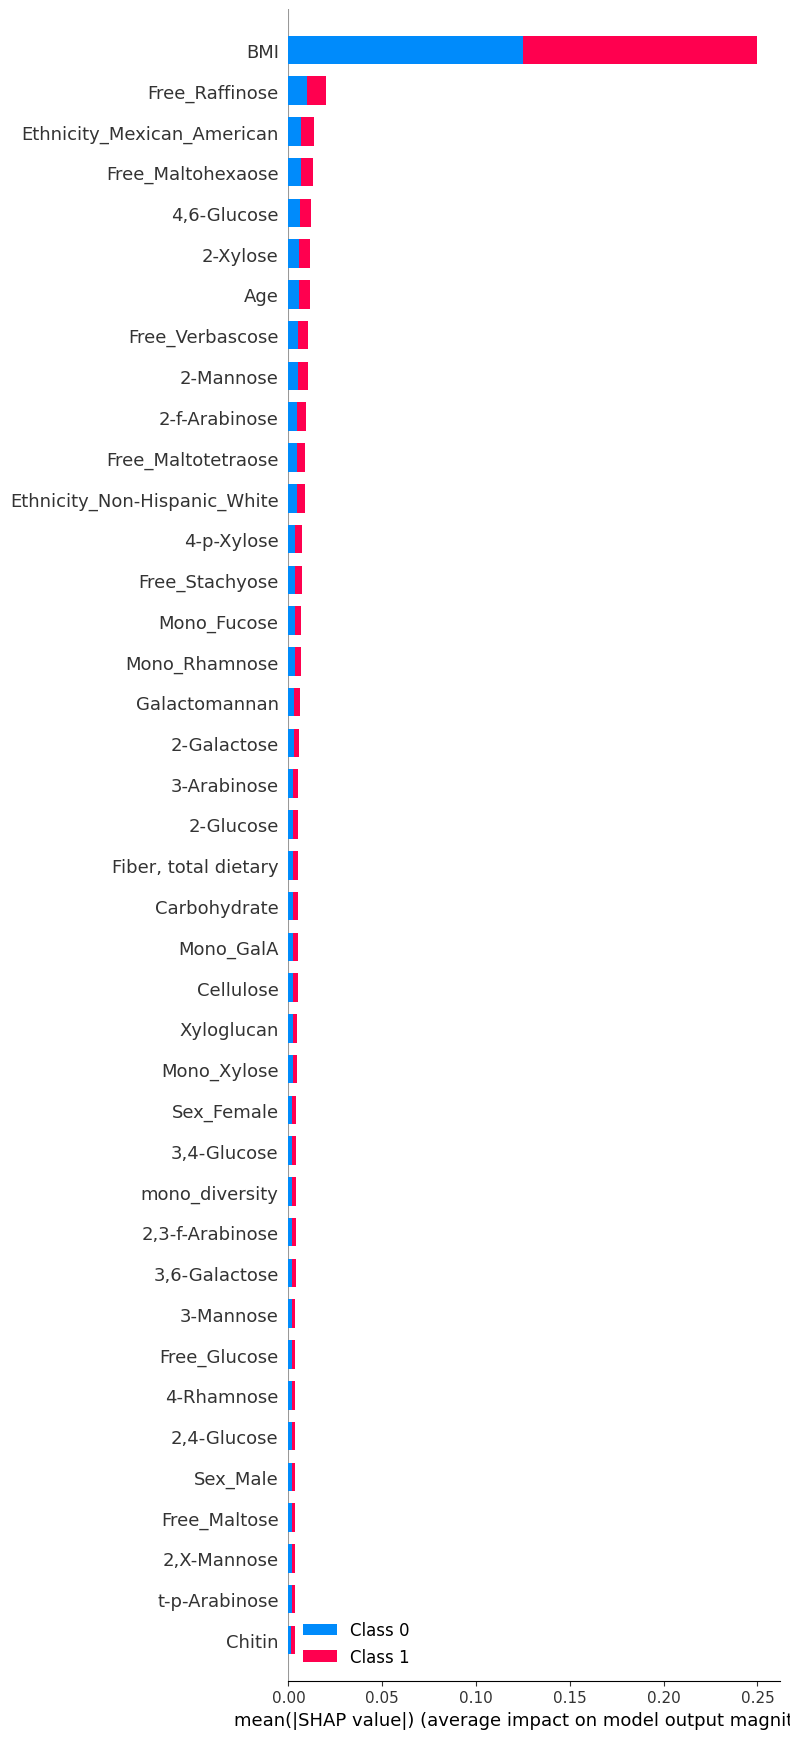

In [8]:
shap.summary_plot(shap_values, x_test, 
                 feature_names = feature_names, max_display=40)

In [9]:
feature_names

Index(['Age', 'BMI', 'Carbohydrate', 'Fiber, total dietary', 'Sugars, total',
       'Arabinan', 'Galactan', 'Xyloglucan', 'Xylan', 'Mannan', 'Beta-Glucan',
       'Chitin', 'Starch', 'Cellulose', 'Galactomannan', 'Free_Fructose',
       'Free_Glucose', 'Free_Sucrose', 'Free_Maltose',
       'Free_Lactose(trehalose)', 'Free_Kestose', 'Free_Raffinose',
       'Free_Maltotetraose', 'Free_Stachyose', 'Free_Verbascose',
       'Free_Maltohexaose', 'Mono_Galactose', 'Mono_Fructose', 'Mono_Xylose',
       'Mono_Fucose', 'Mono_Rhamnose', 'Mono_GalA', 'Mono_Mannose',
       'Mono_Ribose', 't-Glucose', '4-Glucose', '6-Glucose',
       '3-Glucose/3-Galactose', '2-Glucose', '4,6-Glucose', '3,4-Glucose',
       '2,4-Glucose', '3,4,6-Glucose', 't-Galactose', '6-Galactose',
       '4-Galactose', '2-Galactose', '4,6-Galactose', '3,6-Galactose',
       '3,4-Galactose', 't-p-Xylose', '4-p-Xylose', '3-Xylose', '2-Xylose',
       '3,4-P-Xylose/3,5-Arabinose', '2,4-p-Xylose', 't-f-Arabinose',
       't-p-

In [13]:
#create new names for plotting
new_names = ['Age', 'BMI', 'Carbohydrate', 'Fiber, total dietary', 'Sugars, total',
       'Arabinan', 'Galactan', 'Xyloglucan', 'Xylan', 'Mannan', 'Beta-Glucan',
       'Chitin', 'Starch', 'Cellulose', 'Galactomannan', 'Fructose',
       'Glucose', 'Sucrose', 'Maltose',
       'Lactose(trehalose)', 'Kestose', 'Raffinose',
       'Maltotetraose', 'Stachyose', 'Verbascose',
       'Maltohexaose', 'Monomeric Galactose', 'Monomeric Fructose', 'Monomeric Xylose',
       'Monomeric Fucose', 'Monomeric Rhamnose', 'Monomeric GalA', 'Monomeric Mannose',
       'Monomeric Ribose', 't-Glucose', '4-Glucose', '6-Glucose',
       '3-Glucose/3-Galactose', '2-Glucose', '4,6-Glucose', '3,4-Glucose',
       '2,4-Glucose', '3,4,6-Glucose', 't-Galactose', '6-Galactose',
       '4-Galactose', '2-Galactose', '4,6-Galactose', '3,6-Galactose',
       '3,4-Galactose', 't-p-Xylose', '4-p-Xylose', '3-Xylose', '2-Xylose',
       '3,4-P-Xylose/3,5-Arabinose', '2,4-p-Xylose', 't-f-Arabinose',
       't-p-Arabinose', '5-f-Arabinose', '3-Arabinose', '2-f-Arabinose',
       '2,3-f-Arabinose', 't-Fucose', 't-Rhamnose', '4-Rhamnose', '2-Rhamnose',
       '2,4-Rhamnose', 't-Mannose', '4-Mannose', '3-Mannose', '2-Mannose',
       '4,6-Mannose', '2,X-Mannose', '3,4,6-Mannose', 'poly_diversity',
       'free_diversity', 'mono_diversity', 'linkage_diversity', 'Female',
       'Male', 'Ethnicity: Mexican American',
       'Ethnicity: Non-Hispanic Black', 'Ethnicity: Non-Hispanic White',
       'Ethnicity: Other Hispanic', 'Ethnicity: Other Multi-Racial']

In [11]:
import matplotlib
font = {'family' : 'Sans serif',
        'size'   : 8}

matplotlib.rc('font', **font)
matplotlib.rcParams.update({'font.size': 8})

Original size: [8.  9.5]
New size: [12. 10.]


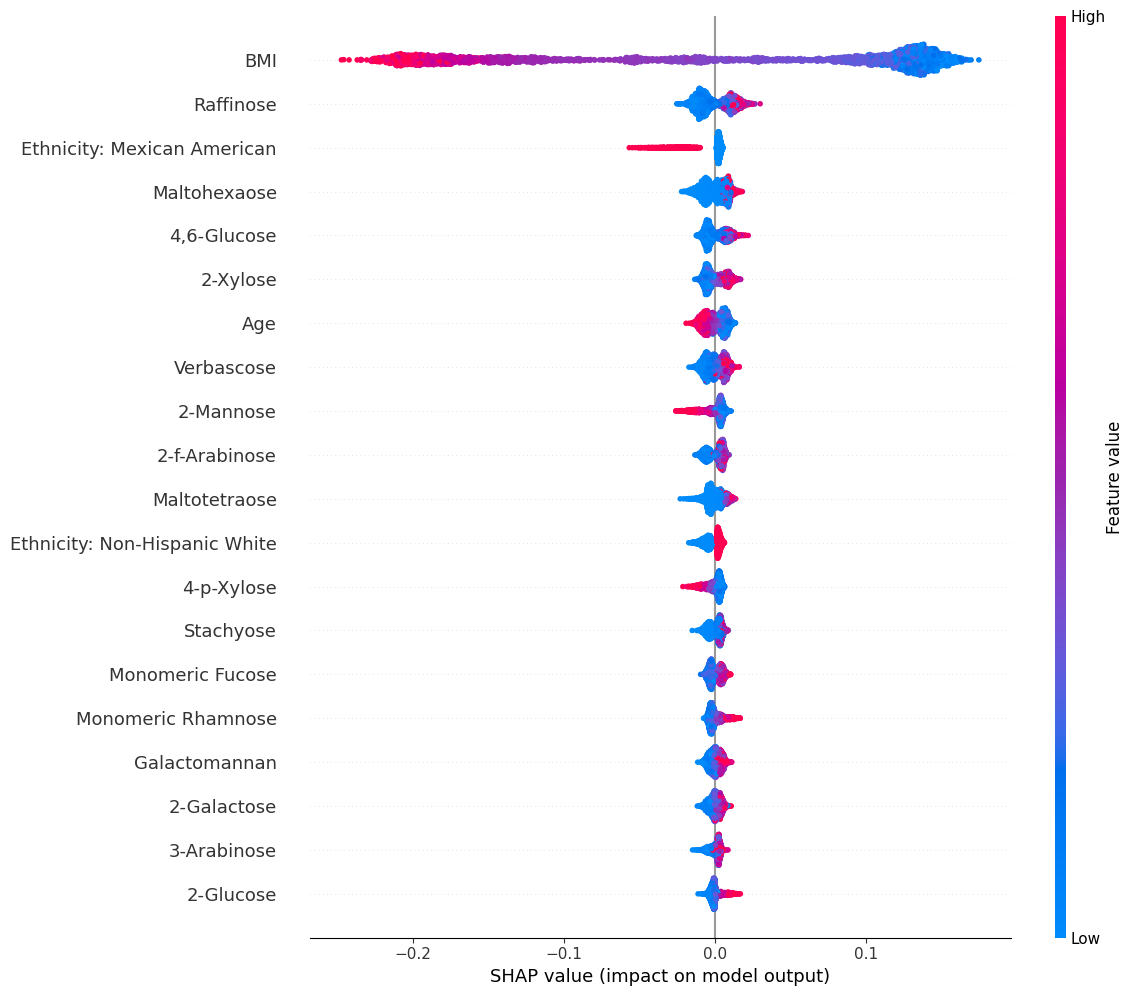

In [14]:
shap.summary_plot(shap_values[0], x_test, 
                 feature_names = new_names, plot_type = 'dot', max_display=20, show=False)

#Add this code
print(f'Original size: {plt.gcf().get_size_inches()}')
w, _ = plt.gcf().get_size_inches()
plt.gcf().set_size_inches(12, 10)
plt.tight_layout()
print(f'New size: {plt.gcf().get_size_inches()}')

plt.savefig('../plots/shap_rf_20.png', bbox_inches='tight',dpi=300)